In [6]:
from fact.io import read_h5py
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = read_h5py('gamma_test.hdf5', key='events')

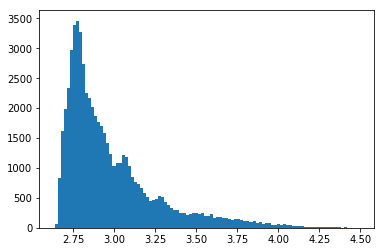

In [5]:
plt.hist(np.log10(df.gamma_energy_prediction), bins=100)
None

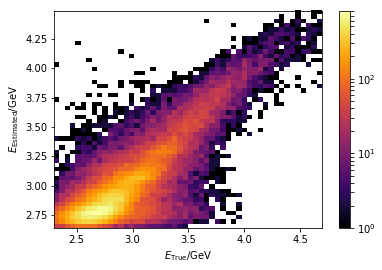

In [16]:
from matplotlib.colors import LogNorm

plt.hist2d(
    np.log10(df.corsika_evt_header_total_energy),
    np.log10(df.gamma_energy_prediction),
    bins=50,
    norm=LogNorm(),
    cmap='inferno'
)
plt.xlabel('$E_\mathrm{True} / \mathrm{GeV}$')

plt.ylabel('$E_\mathrm{Estimated} / \mathrm{GeV}$')
None
plt.colorbar()

In [17]:
protons = read_h5py('proton_workshop.hdf5', key='events')
gammas = read_h5py('gamma_train.hdf5', key='events')

In [19]:
proton_sample = protons.sample(50000)
gamma_sample = gammas.sample(50000)

In [29]:
gamma_sample['label'] = 'gamma'
proton_sample['label'] = 'proton'

gamma_sample['labelid'] = 1
proton_sample['labelid'] = 0

In [30]:
df = pd.concat([gamma_sample, proton_sample], ignore_index=True)

In [34]:
df.label.value_counts()

gamma     50000
proton    50000
Name: label, dtype: int64

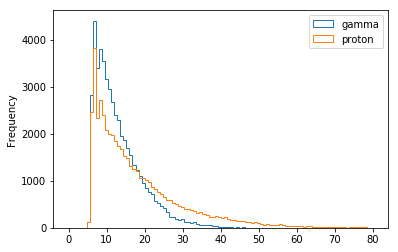

In [31]:
df.groupby('label')['length'].plot.hist(bins=100, range=[0, 80], histtype='step')
plt.legend()

In [39]:
training_variables = [
    'width',
    'size',
    'length',
    'm3_long',
    'm3_trans',
    'm4_long',
    'm4_trans',
    'arr_time_shower_variance',
    'conc_cog',
    'conc_core',
    'leakage',
    'leakage2',
]

In [40]:
X = df[training_variables]
y = df['labelid']

In [43]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
clf = RandomForestClassifier(n_estimators=50, n_jobs=-1)

In [82]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [83]:
prediction = clf.predict_proba(X_test)

In [86]:
gamma_prediction = prediction[:, 1]

In [51]:
from sklearn.metrics import roc_auc_score, roc_curve

In [87]:
fpr, tpr, thresholds = roc_curve(y_test, gamma_prediction)

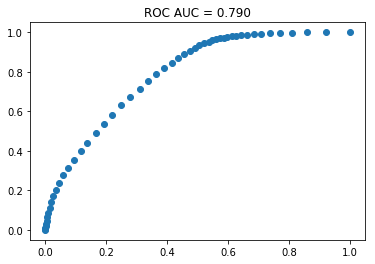

In [89]:
plt.plot(fpr, tpr, 'o')
plt.title('ROC AUC = {:.3f}'.format(roc_auc_score(y_test, gamma_prediction)))
None

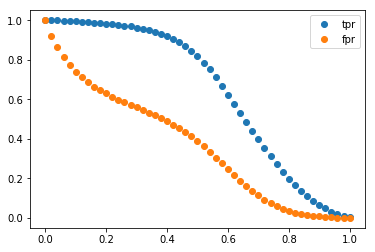

In [67]:
mask = thresholds <= 1.0
plt.plot(thresholds[mask], tpr[mask], 'o', label='tpr')
plt.plot(thresholds[mask], fpr[mask], 'o', label='fpr')
plt.legend()

In [ ]:
from sklearn.model_selection import cross_val_score

In [72]:
result = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')

array([ 0.786316  ,  0.7948323 ,  0.78870067,  0.79256521,  0.79509571])

In [73]:
result = _

In [77]:
print('{:.3f} ± {:.3f}'.format(np.mean(result), np.std(result)))

0.792 ± 0.003


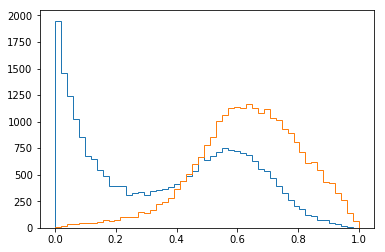

In [80]:
plt.hist(prediction[y_test==0], range=[0, 1], bins=51, histtype='step', label='Proton')
plt.hist(prediction[y_test==1], range=[0, 1], bins=51, histtype='step', label='Gamma')
Nonen_estimators=50